# Practice with me

In [1]:
#First we import the packages we will use:

#pandas for data manipulation.
import pandas as pd

#numpy for its powerful array.
import numpy as np

#matplotlib for beautiful visualizations.
import matplotlib.pyplot as plt

In [2]:
#read the data with simple read_csv, Note that if the dataset has a built-in index we specify index_col arg to 0.
data = pd.read_csv('police.csv')

In [3]:
#to print the first few rows of the dataset.
data.head()

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [4]:
#to get some summery statistics of the numerical cols in the dataset.
data.describe()

,county_name,driver_age_raw,driver_age
count,0.0,86414.000000,86120.000000
mean,NaN,1970.491228,34.011333
std,NaN,110.914909,12.738564
min,NaN,0.000000,15.000000
25%,NaN,1967.000000,23.000000
50%,NaN,1980.000000,31.000000
75%,NaN,1987.000000,43.000000
max,NaN,8801.000000,99.000000


In [5]:
#to get the columns names.
data.columns

Index(['stop_date', 'stop_time', 'county_name', 'driver_gender',
       'driver_age_raw', 'driver_age', 'driver_race', 'violation_raw',
       'violation', 'search_conducted', 'search_type', 'stop_outcome',
       'is_arrested', 'stop_duration', 'drugs_related_stop'],
      dtype='object')

In [6]:
#the number of rows and columns in the dataset, (rows, cols).
data.shape

(91741, 15)

In [7]:
#the data types of the columns values, Note that you can have only the same values within one column.
data.dtypes

stop_date              object
stop_time              object
county_name           float64
driver_gender          object
driver_age_raw        float64
driver_age            float64
driver_race            object
violation_raw          object
violation              object
search_conducted         bool
search_type            object
stop_outcome           object
is_arrested            object
stop_duration          object
drugs_related_stop       bool
dtype: object

In [8]:
#to get the number of missing values in each col, this line of code have to parts, the first part: data.isnull() which returns True or false for each Nan value
#the second part is: .sum() which sums the num of missing values in each col.
data.isnull().sum()

stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5335
driver_age_raw         5327
driver_age             5621
driver_race            5333
violation_raw          5333
violation              5333
search_conducted          0
search_type           88545
stop_outcome           5333
is_arrested            5333
stop_duration          5333
drugs_related_stop        0
dtype: int64

# First let's remove the cols containing only missing values

In [9]:
#We can do this in more than one way.
#we can use dropna() method, dropna by default drops all Nan values in dataframe, but we can manipulate its args to drop
#cols only containing Nan values
#axis = 'columns' to drop cols, inplace = True to change the original dataframe and not return new dataframe, how ='all' means the cols which all its values are missing
data.dropna(axis='columns',inplace=True,how='all')

In [10]:
#another way is to use drop method, but with this method we specifiy the column as the first argument.
#data.drop('county_name',axis='columns',inplace=True)

In [11]:
#always check your work
data.isnull().sum()

stop_date                 0
stop_time                 0
driver_gender          5335
driver_age_raw         5327
driver_age             5621
driver_race            5333
violation_raw          5333
violation              5333
search_conducted          0
search_type           88545
stop_outcome           5333
is_arrested            5333
stop_duration          5333
drugs_related_stop        0
dtype: int64

# Do men or women speed more often?

In [12]:
#we can group them by gender which is driver_gender column
speeding=data.groupby('driver_gender')['violation_raw'].value_counts(normalize=True)

#we can access it as a multi-index dataframe to get what we want
speeding.loc[[('F','Speeding'),("M",'Speeding')]]

###OR you can use .loc[: , 'Speedig'],we deal with it as a dataframe that we picked the speeding column from

driver_gender  violation_raw
F              Speeding         0.65850
M              Speeding         0.52435
Name: violation_raw, dtype: float64

# Do men or women get searched more often when pulled over?

In [13]:
data.groupby('driver_gender')['search_conducted'].value_counts(normalize =True).loc[:, True]
#or we can use mean() to get the true values of males and females,Note that True = 1 and False = 0 ,so the mean would be the True values.
##data.groupby('driver_gender')['search_conducted'].mean()##


driver_gender
F    0.020033
M    0.043326
Name: search_conducted, dtype: float64

In [14]:
#we can also get the percentage of men and women one at a time.
data[data.driver_gender=="F"].search_conducted.value_counts(normalize=True)

False    0.979967
True     0.020033
Name: search_conducted, dtype: float64

In [15]:
data[data.driver_gender=="M"].search_conducted.value_counts(normalize=True)

False    0.956674
True     0.043326
Name: search_conducted, dtype: float64

### remember:
- There is more than one way to understand a question

In [16]:
#ok let's check back the missing count
data.isna().sum()

stop_date                 0
stop_time                 0
driver_gender          5335
driver_age_raw         5327
driver_age             5621
driver_race            5333
violation_raw          5333
violation              5333
search_conducted          0
search_type           88545
stop_outcome           5333
is_arrested            5333
stop_duration          5333
drugs_related_stop        0
dtype: int64

# so why is search_type missing so often?
- well let's check search conducted

In [17]:
data.search_conducted.value_counts()

False    88545
True      3196
Name: search_conducted, dtype: int64

## we notice that the false values are exactly the same as missing search types
- so this explains that every time no search is conducted then there is no search type

In [18]:
data[data['search_conducted']== False].search_type.value_counts()

Series([], Name: search_type, dtype: int64)

### So why do we get empty series in the cell above?

In [19]:
#will that's because value_counts by default drops the Nan values 
#so we can assign dropna arg in value_counts() to false
data[data['search_conducted']== False].search_type.value_counts(dropna=False)

NaN    88545
Name: search_type, dtype: int64

### voilà!!!

<hr>

# During a search, How often does a driver get frisked?
- Well let's have a look at our data

In [20]:
data.search_type.value_counts()

Incident to Arrest                                          1219
Probable Cause                                               891
Inventory                                                    220
Reasonable Suspicion                                         197
Protective Frisk                                             161
Incident to Arrest,Inventory                                 129
Incident to Arrest,Probable Cause                            106
Probable Cause,Reasonable Suspicion                           75
Incident to Arrest,Inventory,Probable Cause                   34
Incident to Arrest,Protective Frisk                           33
Probable Cause,Protective Frisk                               33
Inventory,Probable Cause                                      22
Incident to Arrest,Reasonable Suspicion                       13
Incident to Arrest,Inventory,Protective Frisk                 11
Inventory,Protective Frisk                                    11
Protective Frisk,Reasonab

In [21]:
#ok looks like we have to pick the cells contains protective frisk
#we can do this using str.contains('string')
frisked = data.search_type.str.contains('Protective Frisk')

In [22]:
#then we can calculate their mean
frisked.mean()

0.08573216520650813

In [23]:
data.columns

Index(['stop_date', 'stop_time', 'driver_gender', 'driver_age_raw',
       'driver_age', 'driver_race', 'violation_raw', 'violation',
       'search_conducted', 'search_type', 'stop_outcome', 'is_arrested',
       'stop_duration', 'drugs_related_stop'],
      dtype='object')

# what is the year with the least number of stops?

In [24]:
#we can use string methods as we did before
data.stop_date.str.slice(0, 4).value_counts()
#slice returns a slice we specify from string, so we specified 0 to 4 to get the year part of the stop date col

2012    10970
2006    10639
2007     9476
2014     9228
2008     8752
2015     8599
2011     8126
2013     7924
2009     7908
2010     7561
2005     2558
Name: stop_date, dtype: int64

### remember that string methods is applied on a col/series

<hr>

In [25]:
#we can compine 2 cols using str.cat method
#we use it like : first_col.str.cat(second_col , sep = ' ')
combined = data.stop_date.str.cat(data.stop_time, sep=' ')

#then we save it as a new col to use it later, and we can cast it to datetime data type which is very useful in pandas
data['stop_datetime'] = pd.to_datetime(combined)

#Note that you can convert to datetime with date only

In [26]:
#Remember to check your work
data.head()

#new col is here ✅

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,stop_datetime
0,2005-01-02,01:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005-01-02 01:55:00
1,2005-01-18,08:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005-01-18 08:15:00
2,2005-01-23,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005-01-23 23:15:00
3,2005-02-20,17:15,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,2005-02-20 17:15:00
4,2005-03-14,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005-03-14 10:00:00


In [27]:
#then you can select month or year or day using data.colName.dt.year or .month
data.stop_datetime.dt.year.value_counts() ## you can sort_values to get the samllest on top by adding .sort_values() at the end.

2012    10970
2006    10639
2007     9476
2014     9228
2008     8752
2015     8599
2011     8126
2013     7924
2009     7908
2010     7561
2005     2558
Name: stop_datetime, dtype: int64

# So, How does drug activity change by time of day?

<AxesSubplot:xlabel='stop_datetime'>

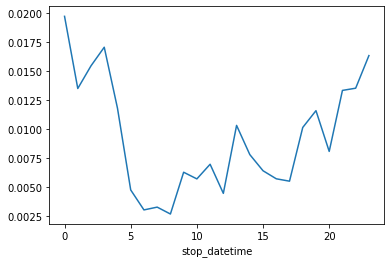

In [28]:
#we could group drugs related stops by day hours 'the same as we did with month' 
#but remember to take the mean of drugs related stops because you cannot line plot bool and you will get error
data.groupby(data.stop_datetime.dt.hour).drugs_related_stop.mean().plot()

#note we didn't specify anything in plot cz the default plot of series is line plot
#note you don't have to plt.show() if you are in jupyter notebook.

## So, drug activity is less during the day

<hr>

In [29]:
data.head()

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,stop_datetime
0,2005-01-02,01:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005-01-02 01:55:00
1,2005-01-18,08:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005-01-18 08:15:00
2,2005-01-23,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005-01-23 23:15:00
3,2005-02-20,17:15,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,2005-02-20 17:15:00
4,2005-03-14,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005-03-14 10:00:00


<AxesSubplot:>

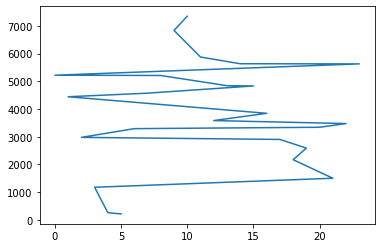

In [30]:
#we can access number of stops each hour then plot it
data.stop_datetime.dt.hour.value_counts().plot()

## but things does not look right so what can we do to make it look right?
### you guessed right we must sort something but what is it?
- lets try

<AxesSubplot:>

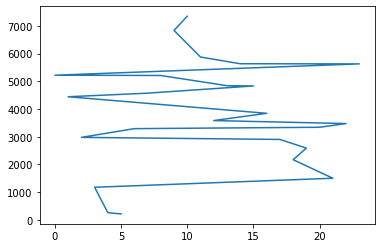

In [31]:
#lets try sort values
data.stop_datetime.dt.hour.value_counts().sort_values().plot()

## well there is no difference because sort_values automatically sort values so you don't have to 
- lets try to sort by index


<AxesSubplot:>

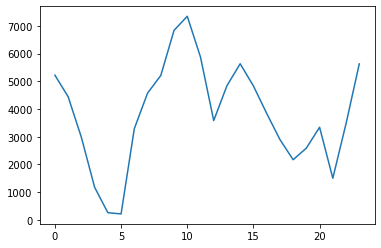

In [32]:
data.stop_datetime.dt.hour.value_counts().sort_index().plot()

### horray here you go
<hr>

# Let's find the bad data in the stop_duration column and fix it

## So, what do you think is bad data?
### well it may be a typo or a wrong data type 

In [33]:
#time to check our data
data.stop_duration.value_counts()

#well what could 2 and 1 mean? they maybe hours or minutes but we don't know, so what would we do with them?

0-15 Min     69543
16-30 Min    13635
30+ Min       3228
1                1
2                1
Name: stop_duration, dtype: int64

In [36]:
#we could add them to nan values by:
data.loc[(data.stop_duration == '1') | (data.stop_duration == '2'), 'stop_duration'] = 'NaN'

In [37]:
#let's check our work
data.stop_duration.value_counts(dropna=False)

0-15 Min     69543
16-30 Min    13635
NaN           5333
30+ Min       3228
NaN              2
Name: stop_duration, dtype: int64

### didn't work as expected they have not been added to the existed nan, so what's wrong?


In [38]:
# well it is because nan is np.nan not 'nan'
data.loc[data.stop_duration == 'NaN', 'stop_duration'] = np.nan

In [39]:
#final check will it work?
data.stop_duration.value_counts(dropna=False)

0-15 Min     69543
16-30 Min    13635
NaN           5335
30+ Min       3228
Name: stop_duration, dtype: int64

# It did.